In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [196]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [197]:
df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [198]:
df.dropna(inplace=True)

In [199]:
df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [200]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [201]:
df.shape

(183, 12)

In [202]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [203]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [204]:
df['Age'] = df['Age'].apply(np.int64)
df['Age'].head()

1     38
3     35
6     54
10     4
11    58
Name: Age, dtype: int64

Oldest person in the titanic:

In [205]:
df['Age'].idxmax()

630

In [206]:
df.loc[630]

PassengerId                                     631
Survived                                          1
Pclass                                            1
Name           Barkworth, Mr. Algernon Henry Wilson
Sex                                            male
Age                                              80
SibSp                                             0
Parch                                             0
Ticket                                        27042
Fare                                           30.0
Cabin                                           A23
Embarked                                          S
Name: 630, dtype: object

Youngest person in the titanic:

In [210]:
df['Age'].idxmin()

305

In [20]:
df.loc[305]

PassengerId                               306
Survived                                    1
Pclass                                      1
Name           Allison, Master. Hudson Trevor
Sex                                      male
Age                                      0.92
SibSp                                       1
Parch                                       2
Ticket                                 113781
Fare                                   151.55
Cabin                                 C22 C26
Embarked                                    S
Name: 305, dtype: object

Amount ages:

In [207]:
age = df.value_counts('Age')
age

Age
36    12
24     9
35     6
19     6
31     5
58     5
39     5
27     5
29     5
47     5
48     5
49     5
45     4
50     4
33     4
32     4
52     4
30     4
40     4
38     4
18     4
25     4
23     4
37     3
42     3
4      3
16     3
17     3
54     3
21     3
2      3
22     3
56     3
44     3
46     2
51     2
65     2
28     2
61     2
34     2
60     2
64     1
63     1
70     1
62     1
71     1
57     1
0      1
55     1
53     1
43     1
41     1
1      1
26     1
15     1
14     1
11     1
6      1
3      1
80     1
Name: count, dtype: int64

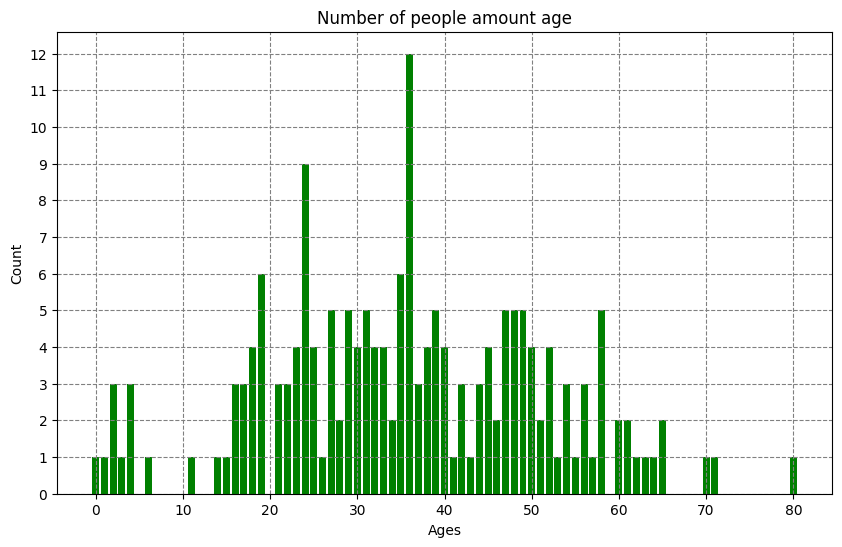

In [208]:
plt.figure(figsize=(10, 6))
plt.bar(age.index, age.values, color='green')
plt.title('Number of people amount age')
plt.ylabel('Count')
plt.xlabel('Ages')
plt.yticks(np.arange(0, 13))
plt.grid(color='gray', linestyle='--')

plt.show()


Amount of male and females:

In [36]:
sex_count = df.value_counts('Sex')
print(sex_count)

Sex
male      95
female    88
Name: count, dtype: int64


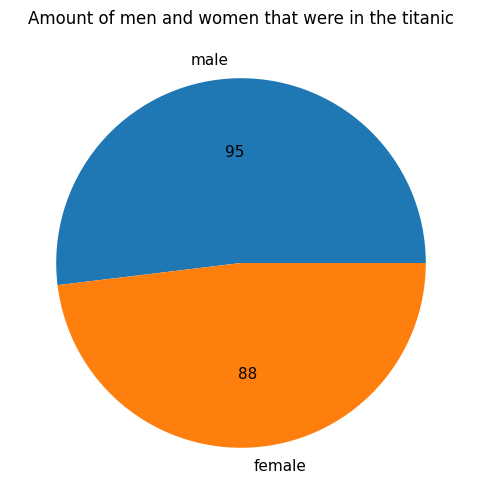

In [117]:
def m_w(val):
    total = sum(sex_count.values)
    res = val * total / 100
    return int(res) 

plt.figure(figsize=(9, 6))
plt.pie(sex_count, labels=sex_count.index, autopct=m_w, textprops={'fontsize': 11})
plt.title('Amount of men and women that were in the titanic')

plt.show()